In [2]:
from loica import *
import matplotlib.pyplot as plt
import numpy as np
import getpass
import matplotlib.pyplot as plt
from scipy.signal import correlate
plt.rcParams.update({'font.size': 8})

In [3]:
from flapjack import *
#fj = Flapjack(url_base='flapjack.rudge-lab.org:8000')
fj = Flapjack(url_base='localhost:8000')
fj.log_in(username=input('Flapjack username: '), password=getpass.getpass('Password: '))

Flapjack username: tim
Password: ········


In [4]:
fj.get('assay')

,id,name,machine,description,temperature,study
0,2,k1 rep 1 mg1655,HTX Synergy,test,37.0,1
1,1,k1 rep 1 mg1655,HTX Synergy,test,37.0,1


### Constitutive gene

In [5]:
area = fj.get('signal', name='OD')
red = fj.get('signal', name='RFP')
green = fj.get('signal', name='YFP')
blue = fj.get('signal', name='CFP')
r = Reporter(name='R', degradation_rate=0, signal_id=red.id[0])
g = Reporter(name='G', degradation_rate=0, signal_id=green.id[0])
b = Reporter(name='B', degradation_rate=0, signal_id=blue.id[0])    
rsource = Source(r, 1)
gsource = Source(g, 1)
bsource = Source(b, 1)

In [10]:
medias = ['M9-glicerol', 'M9-glucosa']
strains = ['MG1655z1'] #, 'Top10']
vector = fj.get('vector', name='pAAA')
signals = [red, green, blue, area]
colors = ['red', 'green', 'blue', 'black']
eps = 0.01

100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


Returning dataframe


100%|██████████| 100/100 [00:04<00:00, 24.74it/s]


Returning dataframe


100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 33.72it/s]


Returning dataframe


100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


Returning dataframe


100%|██████████| 100/100 [00:03<00:00, 26.56it/s]


Returning dataframe


100%|██████████| 100/100 [00:49<00:00,  2.04it/s]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 36.99it/s]


Returning dataframe


100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


Returning dataframe


100%|██████████| 100/100 [00:03<00:00, 28.00it/s]


Returning dataframe


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 37.06it/s]


Returning dataframe


100%|██████████| 100/100 [03:53<00:00,  2.33s/it]


Returning dataframe


100%|██████████| 100/100 [00:03<00:00, 30.26it/s]


Returning dataframe


100%|██████████| 100/100 [04:11<00:00,  2.51s/it]


Returning dataframe


100%|██████████| 100/100 [00:03<00:00, 29.59it/s]


Returning dataframe


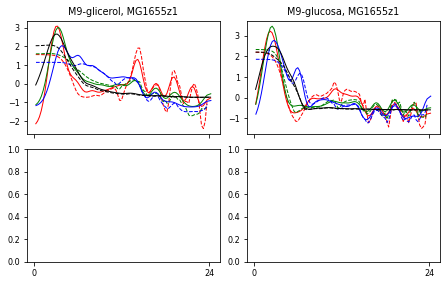

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
deltas = []
fig,axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(6.5,4))
axs = axs.ravel()
for color,sig in zip(colors,signals):
    #fig,axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(6.5,1.25))            
    col = 0
    for med in medias:
        for st in strains:
            media = fj.get('media', name=med)
            strain = fj.get('strain', name=st)
            
            dfinv = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=strain.id,
                            signal=sig.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            degr=0,
                            n_gaussians=48,
                            biomass_signal=area.id,
                           )
            rprofile = dfinv.groupby('Time').Rate.mean().values
            rstd = dfinv.groupby('Time').Rate.std().values / rprofile.std()
            t = dfinv.groupby('Time').mean().index
            rprofile = (rprofile - rprofile.mean()) / rprofile.std()
            axs[col].plot(t, rprofile, '-', color=color, linewidth=1)
            #axs[col].fill_between(t, rprofile-rstd, rprofile+rstd, color=color, alpha=0.2)
            
            dfdir = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=strain.id,
                            signal=sig.id,
                            type='Expression Rate (direct)',
                            eps_L=1e-5,
                            biomass_signal=area.id)
            rprofile = dfdir.groupby('Time').Rate.mean().values
            rstd = dfdir.groupby('Time').Rate.std().values / rprofile.std()
            t = dfdir.groupby('Time').mean().index
            rprofile = (rprofile - rprofile.mean()) / rprofile.std()
            axs[col].plot(t, rprofile, '--', color=color, linewidth=1)
            #axs[col].fill_between(t, rprofile-rstd, rprofile+rstd, color=color, alpha=0.2)

                
            axs[col].set_xticks([0,24]) 
            axs[col].set_title(f'{med}, {st}')
            col += 1
#plt.legend(['Inverse method', 'Direct method'])
#plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left=0.1)
plt.savefig(f'Comp_{vector.name[0]}.png', dpi=300)




In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
deltas = []
for color,sig in zip(colors,signals):
    fig,axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(6.5,1.25))            
    col = 0
    for med in medias:
        for st in strains:
            media = fj.get('media', name=med)
            strain = fj.get('strain', name=st)
            
            dfexp = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=strain.id,
                            signal=sig.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=24,
                            biomass_signal=area.id,
                           )
            rprofile = dfexp.groupby('Time').Rate.mean().values
            rstd = dfexp.groupby('Time').Rate.std().values / rprofile.std()
            t = dfexp.groupby('Time').mean().index
            #rsource.characterize(fj, vector.id, media.id, strain.id, sig.id, area.id, 20, eps)
            #t = np.linspace(0, 24, 100)
            #rprofile = rsource.profile(t) * rsource.rate
            rprofile = (rprofile - rprofile.mean()) / rprofile.std()
            axs[col].plot(t, rprofile, '-', color=color, linewidth=1)
            axs[col].fill_between(t, rprofile-rstd, rprofile+rstd, color=color, alpha=0.2)
            
            dfgr = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=strain.id,
                            signal=area.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=24,
                            biomass_signal=area.id,
                           )
            muval = dfgr.groupby('Time').Rate.mean().values
            t = dfgr.groupby('Time').mean().index
            #od0, od, mu = characterize_growth(fj, vector.id, media.id, strain.id, area.id, 20, epsilon=eps)
            #muval = mu(t)
            muval = (muval-muval.mean()) / muval.std()
            corr = correlate(rprofile, muval)
            axin = axs[col].inset_axes([0.6, 0.6, 0.35, 0.35])
            axin.set_xticks([])
            axin.set_yticks([])
            axin.axhline(linewidth=1, color='gray')
            axin.axvline(x=100, linewidth=1, color='gray')
            axin.plot(corr, '-', color='black', linewidth=1)
            
            # Plot time of peak growth
            pk = np.where(muval==muval.max())[0][0]
            pk_time = t[pk]
            axs[col].axvline(x=pk_time, color='black', linestyle='--')
            
            # Collect difference between peaks
            df = pd.concat([dfexp, dfgr])
            for id,samp in df.groupby('Sample'):
                muval = samp[samp.Signal=='OD'].groupby('Time').Rate.mean().values
                pk = np.where(muval==muval.max())[0][0]
                pk_time = t[pk]
                fval = samp[samp.Signal==sig.name[0]].groupby('Time').Rate.mean().values
                fpk = np.where(fval==fval.max())[0][0]
                fpk_time = t[fpk]
                delta = fpk_time - pk_time
                deltas.append(delta)
                
            axs[col].set_xticks([0,24])

            #er_direct = fj.analysis(media=media.id, 
            #                strain=strain.id,
            #                vector=vector.id,
            #                signal=sig.id,
            #                type='Expression Rate (direct)',
            #                biomass_signal=area.id,
            #                eps_L=1e-5
            #                  )
            #er_direct = er_direct.sort_values('Time')
            #rfp = er_direct[er_direct.Signal==sig.name[0]].groupby('Time').mean().Rate.values
            #rt = er_direct[er_direct.Signal==sig.name[0]].groupby('Time').mean().index
            #rfp = (rfp - np.nanmean(rfp)) / np.nanstd(rfp)
            #axs[col].plot(rt, rfp, '--', color=color, linewidth=1)
            #axs[col].set_xticks([0,24])
            
            col += 1
    #plt.legend(['Inverse method', 'Direct method'])
    #plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(left=0.1)
    plt.savefig(f'{vector.name[0]}_{sig.name[0]}.png', dpi=300)



print('Mean delta = ', np.mean(deltas))
print('Std delta = ', np.std(deltas))

In [ ]:
vector

In [ ]:
m9gluc = fj.get('media', name='M9-glucose').id[0]
mg1655z1 = fj.get('strain', name='MG1655z1').id[0]
top10 = fj.get('strain', name='Top10').id[0]
dfred = fj.analysis(vector=vector.id,
                            media=[m9gluc],
                            strain=[top10],
                            signal=red.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=18,
                            biomass_signal=area.id,
                           )
dfgreen = fj.analysis(vector=vector.id,
                            media=[m9gluc],
                            strain=[top10],
                            signal=green.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=18,
                            biomass_signal=area.id,
                           )
dfblue = fj.analysis(vector=vector.id,
                            media=[m9gluc],
                            strain=[top10],
                            signal=blue.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=18,
                            biomass_signal=area.id,
                           )
dfgr = fj.analysis(vector=vector.id,
                            media=[m9gluc],
                            strain=[top10],
                            signal=area.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=18,
                            biomass_signal=area.id,
                           )

In [ ]:
plt.plot(dfgr.groupby('Time').mean().Rate**2, dfred.groupby('Time').mean().Rate, '.')
plt.plot(dfgr[dfgr.Time<4].groupby('Time').mean().Rate**2, dfred[dfred.Time<4].groupby('Time').mean().Rate, 'r.')

plt.figure()
plt.plot(dfgr.Rate, dfgreen.Rate, '.')
plt.plot(dfgr[dfgr.Time<4].Rate**2, dfgreen[dfgreen.Time<4].Rate, 'r.')

plt.figure()
plt.plot(dfgr.Rate, dfblue.Rate, '.')
plt.plot(dfgr[dfgr.Time<4].Rate, dfblue[dfblue.Time<4].Rate, 'r.')

In [ ]:
cfp = dfblue.groupby('Time').mean().Measurement
rfp = dfred.groupby('Time').mean().Measurement
yfp = dfgreen.groupby('Time').mean().Measurement

plt.plot(rfp, yfp)

In [ ]:
#plt.plot(dfgr.Time, dfgr.Rate, '.')
plt.plot(dfgr.Time, dfgr.Rate, '.')

In [ ]:
from scipy.stats import ttest_ind
top10 = fj.get('strain', name='Top10').id[0]
mg1655z1 = fj.get('strain', name='MG1655z1').id[0]
dfred = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=[top10],
                            signal=red.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=20,
                            biomass_signal=area.id,
                           )
dfgreen = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=[top10],
                            signal=green.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=20,
                            biomass_signal=area.id,
                           )
dfblue = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=[top10],
                            signal=blue.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=20,
                            biomass_signal=area.id,
                           )

In [ ]:
rc = dfgreen.groupby('Time').mean().Rate.values #/ dfblue.groupby('Time').mean().Rate.values
plt.plot(rc)

In [ ]:
from scipy.stats import kruskal

gstrain = df.groupby('Strain')
for st,stdata in gstrain:
    gs = stdata.groupby('Sample')
    rcorrs=[]
    ycorrs=[]
    ccorrs=[]
    for s,data in gs:
        r = data[data.Signal=='RFP'].sort_values('Time')
        y = data[data.Signal=='YFP'].sort_values('Time')
        c = data[data.Signal=='CFP'].sort_values('Time')
        od = data[data.Signal=='OD'].sort_values('Time')
        rc = np.corrcoef(r.Rate.values, od.Rate.values[1:])
        rcorrs.append(rc[1,0])
        yy = np.corrcoef(y.Rate.values, od.Rate.values[1:])
        ycorrs.append(yy[1,0])
        cc = np.corrcoef(c.Rate.values, od.Rate.values[1:])
        ccorrs.append(cc[1,0])

    plt.hist(rcorrs) #, color='red')
    plt.hist(ycorrs) #, color='yellow')
    plt.hist(ccorrs) #, color='cyan')

    print(kruskal(rcorrs, ycorrs, ccorrs))
    print(ttest_ind(rcorrs, ycorrs))
    print(ttest_ind(rcorrs, ccorrs))
    print(ttest_ind(ycorrs, ccorrs))

In [ ]:
gs = df.groupby('Sample')
t10corrs = []
mgcorrs = []
for s,data in gs:
    t10 = data[data.Strain=='Top10'].sort_values('Time')
    mg = data[data.Strain=='MG1655z1'].sort_values('Time')
    t10corrs.append(np.corrcoef(t10[t10.Signal=='OD'].Rate.values[1:], t10[t10.Signal=='RFP'].Rate.values)[0,1])
    mgcorrs.append(np.corrcoef(mg[mg.Signal=='OD'].Rate.values[1:], mg[mg.Signal=='RFP'].Rate.values)[0,1])
    
plt.hist(t10corrs)
plt.hist(mgcorrs)

In [ ]:
df = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=strain.id,
                            signal=area.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=24,
                            biomass_signal=area.id,
                           )
rprofile = df.groupby('Time').Rate.mean().values
rstd = df.groupby('Time').Rate.std().values  #/ rprofile.std()
#rprofile = (rprofile - rprofile.mean()) / rprofile.std()
plt.plot(t, rprofile, '-', color=color, linewidth=1)
plt.fill_between(t, rprofile-rstd, rprofile+rstd, color=color, alpha=0.2)

In [ ]:
## corr = correlate(muval, muval)
plt.plot(corr)

In [ ]:
import time

start = time.time()
media = fj.get('media', name=medias[0])
strain = fj.get('strain', name=strains[0])
rsource.characterize(fj, vector.id, media.id, strain.id, blue.id, area.id, 20, eps)
end = time.time()
print(end-start)

In [ ]:
t = np.linspace(0, 24, 100)
plt.plot(rsource.profile(t) * rsource.rate)

In [ ]:
fig,axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(6.5,1.25))            
col = 0
for med in medias:
    for st in strains:
        media = fj.get('media', name=med)
        strain = fj.get('strain', name=st)
        df = fj.analysis(vector=vector.id,
                            media=media.id,
                            strain=strain.id,
                            signal=area.id,
                            type='Expression Rate (inverse)',
                            eps=1e-2,
                            n_gaussians=24,
                            biomass_signal=area.id,
                           )
        muval = df.groupby('Time').Rate.mean().values
        t = df.groupby('Time').mean().index
        mustd = df.groupby('Time').Rate.std().values / muval.std()
        muval = (muval-muval.mean()) / muval.std()
        axs[col].plot(t, muval, '-', color='black', linewidth=1)
        axs[col].fill_between(t, muval-mustd, muval+mustd, color='black', alpha=0.2)
            
        corr = correlate(muval, muval)
        axin = axs[col].inset_axes([0.6, 0.6, 0.35, 0.35])
        axin.set_xticks([])
        axin.set_yticks([])
        axin.axhline(linewidth=1, color='gray')
        axin.axvline(x=100, linewidth=1, color='gray')
        axin.plot(corr, '-', color='black', linewidth=1)

        # Plot time of peak growth
        pk = np.where(muval==muval.max())[0][0]
        pk_time = t[pk]
        axs[col].axvline(x=pk_time, color='black', linestyle='--')


        #er_direct = fj.analysis(media=media.id, 
        #                strain=strain.id,
        #                vector=vector.id,
        #                type='Expression Rate (direct)',
        #                biomass_signal=area.id,
        #                eps_L=1e-5
        #                  )
        #er_direct = er_direct.sort_values('Time')
        #mu = er_direct[er_direct.Signal=='Area'].groupby('Time').mean().Rate.values
        #mut = er_direct[er_direct.Signal=='Area'].groupby('Time').mean().index
        ##rfp = (rfp - np.nanmean(rfp)) / np.nanstd(rfp)
        #axs[col].plot(mut, mu, '--', color='black', linewidth=1)
        axs[col].set_xticks([0,24])

        col += 1
#plt.legend(['Inverse method', 'Direct method'], loc=(1,0))
#plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left=0.1)
plt.savefig(f'{vector.name[0]}_growth_rate.png', dpi=300)

In [ ]:
media = fj.get('media', name='M9-glucose')
strain = fj.get('strain', name='MG1655z1')
vector = fj.get('vector', name='pAAA')
meas = fj.analysis(media=media.id, 
                        strain=strain.id,
                        vector=vector.id,
                        type='Expression Rate (direct)',
                        biomass_signal=area.id,
                        eps_L=1e-5
                          )
rfp = meas[meas.Signal=='RFP'].sort_values('Time').groupby('Time').mean().Measurement.values
yfp = meas[meas.Signal=='YFP'].sort_values('Time').groupby('Time').mean().Measurement.values
cfp = meas[meas.Signal=='CFP'].sort_values('Time').groupby('Time').mean().Measurement.values
od = meas[meas.Signal=='OD'].sort_values('Time').groupby('Time').mean().Measurement.values


In [ ]:
plt.plot(np.diff(yfp[10:40])/np.diff(cfp[10:40]), '.-')
plt.figure()
plt.plot(np.diff(rfp[10:40])/np.diff(cfp[10:40]), '.-')
plt.figure()
plt.plot(np.diff(yfp[10:40])/np.diff(rfp[10:40]), '.-')
#plt.plot(cfp[10:40]/yfp[10:40], '.-')

plt.figure()
plt.plot(rfp[10:40], yfp[10:40], '.-')

plt.figure()
plt.plot(od[10:40])

In [ ]:
odmeas = er_direct[er_direct.Signal=='Area'].groupby('Time').mean().Measurement.values
plt.plot(od, 'k')
plt.plot(odmeas, 'k--')
plt.yscale('log')
print(od0)
print(odmeas[0])

In [ ]:
paaa = fj.measurements(media=media.id, 
                        strain=strain.id,
                        vector=vector.id,
                          )
samples = paaa.Sample.unique()
s0 = samples[0]
paaa = paaa.sort_values('Time')
od = paaa[paaa.Signal=='OD'][paaa.Sample==s0]
rfp = paaa[paaa.Signal=='RFP'][paaa.Sample==s0]
yfp = paaa[paaa.Signal=='YFP'][paaa.Sample==s0]
cfp = paaa[paaa.Signal=='CFP'][paaa.Sample==s0]
plt.figure(figsize=(1,1))
plt.plot(od.Time, od.Measurement, 'k-')
plt.xticks([])
plt.yticks([])
plt.savefig('od.png', dpi=300)
plt.figure(figsize=(1,1))
plt.plot(rfp.Time, rfp.Measurement, 'r-')
plt.xticks([])
plt.yticks([])
plt.savefig('rfp.png', dpi=300)
plt.figure(figsize=(1,1))
plt.plot(yfp.Time, yfp.Measurement, 'g-')
plt.xticks([])
plt.yticks([])
plt.savefig('yfp.png', dpi=300)
plt.figure(figsize=(1,1))
plt.plot(cfp.Time, cfp.Measurement, 'b-')
plt.xticks([])
plt.yticks([])
plt.savefig('cfp.png', dpi=300)

In [ ]:
plt.plot(gr[1:][0])

In [ ]:
from scipy.signal import correlate
c = correlate(rfp, rprofile[5:])
plt.plot(c, 'gray')
plt.plot([95,95], [0, c.max()], 'k--')
rfp.shape

In [ ]:
t = np.linspace(0, 24, 100)
rprofile = rsource.profile(t) * rsource.rate
#rprofile = (rprofile - rprofile.mean()) / rprofile.std()
plt.plot(t, rprofile, 'r')
gprofile = gsource.profile(t) * gsource.rate
#gprofile = (gprofile - gprofile.mean()) / gprofile.std()
plt.plot(t, gprofile, 'g')
bprofile = bsource.profile(t) * bsource.rate
#bprofile = (bprofile - bprofile.mean()) / bprofile.std()
plt.plot(t, bprofile, 'b')

In [ ]:
er_direct = fj.analysis(media=media.id, 
                    strain=strain.id,
                    vector=[vector.id[0]],
                    type='Expression Rate (direct)',
                    biomass_signal=area.id,
                    eps_L=1e-5,
                    pre_smoothing=11,
                    post_smoothing=11,
                    #bg_correction=2,
                    #min_biomass=0.05,
                    #remove_data=False
                      )

In [ ]:
er_direct[er_direct.Signal=='RFP'].groupby('Time').mean().plot(y='Rate', style='-.')
plt.plot(t, rprofile, 'r')
er_direct[er_direct.Signal=='YFP'].groupby('Time').mean().plot(y='Rate', style='-.')
plt.plot(t, gprofile, 'g')
er_direct[er_direct.Signal=='CFP'].groupby('Time').mean().plot(y='Rate', style='-.')
plt.plot(t, bprofile, 'b')

er_direct[er_direct.Signal=='OD'].groupby('Time').mean().plot(y='Rate', style='-.')


In [ ]:
#def profile(t):
#    return 0.1 + 0.9 * gompertz_growth_rate(t, 0.01, 1, 1, 4)
profile = random_profile(t0=0, tmax=24, nt=100, fmax=0.05)
const.add_operator(Source(output=sfp1, rate=1, profile=profile))

In [ ]:
def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 4)
    
metab = SimulatedMetabolism(biomass, growth_rate)

In [ ]:
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')

sample = Sample(circuit=const, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0])

In [ ]:
biomass_signal = fj.get('signal', name='OD')
assay = Assay([sample], 
              n_measurements=100, 
              interval=0.24,
              name='Loica constitutive expression',
              description='Simulated constitutive gene generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', style='.', ax=ax)

In [ ]:
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Testing')
assay.upload(fj, study.id[0])

In [ ]:
source = const.operators[0]
source.characterize(
    fj,
    vector=vector.id,
    media=media.id,
    strain=strain.id,
    signal=cfp.id,
    biomass_signal=biomass_signal.id,
    fmax=0.1,
    epsilon=0
)

In [ ]:
print('Protein degradation rate = ', source.gamma)
t = np.linspace(1, 23, 100)
plt.plot(t, source.profile(t))
plt.plot(t, profile(t))
plt.legend(['Characterization', 'True'])

### Receiver

Create a genetic network and associate it with a Flapjack vector:

In [ ]:
dna = fj.get('dna', name='Rec1')
if len(dna)==0:
    dna = fj.create('dna', name='Rec1')
vector = fj.get('vector', name='Rec1')    
if len(vector)==0:
    vector = fj.create('vector', name='Rec1', dnas=dna.id)
    
rec = GeneticNetwork(vector=vector.id[0])

Create a reporter and associate it with a Flapjack signal so we can record the behaviour of the circuit:

In [ ]:
cfp = fj.get('signal', name='CFP')
sfp1 = Reporter(name='CFP', degradation_rate=0, signal_id=cfp.id[0])

rec.add_reporter(sfp1)

Create and add a receiver operator to the circuit, linking it to an AHL supplement:

In [ ]:
ahl = Supplement(name='AHL')
def sin_profile(t):
    return 1 - np.cos(2 * np.pi * t / 12)
def mu_profile(t):
    return 100 + 1000 * gompertz_growth_rate(t, 0.01, 1, 1, 4)
profile = random_profile(t0=0, tmax=24, nt=100, fmax=0.05)
rec.add_operator(Receiver(inducer=ahl, output=sfp1, a=0, b=1, K=1, n=2, profile=mu_profile))

Now we have constructed the circuit we need to run an assay containing some samples. The sample is driven by a metabolism which defines the dynamics of growth and gene expression profiles:

In [ ]:
def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 4)
    
metab = SimulatedMetabolism(biomass, growth_rate)

Next we create a set of samples associated to Flapjack media and strain, and containing our AHL at different concentrations

In [ ]:
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')

# Create list of samples    
samples = []
for conc in np.logspace(-3, 3, 24):
    sample = Sample(circuit=rec, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0])
    # Add AHL to samples at given concentration
    sample.add_supplement(ahl, conc)
    samples.append(sample)

Now we can create and run the assay:

In [ ]:
biomass_signal = fj.get('signal', name='OD')
assay = Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name='Loica receiver',
              description='Simulated receiver generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

Plot the results:

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='Biomass'].plot(x='Time', y='Measurement', style='.', ax=ax)

Upload the simulated data to flapjack

In [ ]:
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')

assay.upload(fj, study.id[0])

In [ ]:
vector = fj.get('vector', name='pREC4')
media = fj.get('media', name='Simulated media')
strain = fj.get('strain', name='Simulated strain')
signal = fj.get('signal', name='SFP0')
biomass_signal = fj.get('signal', name='SOD')
#print(biomass_signal)

receiver = Receiver(None, None, 0,0,0,0) #rec.operators[0]
receiver.characterize(
    fj,
    vector=vector.id,
    media=media.id,
    strain=strain.id,
    signal=signal.id,
    biomass_signal=biomass_signal.id,
    fmax=0.05,
    epsilon=0.1
)

In [ ]:
print('K = ', receiver.K)
print('n = ', receiver.n)
t = np.linspace(0, 24, 100)
plt.plot(t, receiver.profile(t))
plt.plot(t, 1000 + 500 * gompertz_growth_rate(t, 0.01, 1, 1, 4))
plt.legend(['Characterization', 'True'])

print(receiver.profile(t).mean())
print((1000 + 500 * gompertz_growth_rate(t, 0.01, 1, 1, 4)).mean())

In [ ]:
meas_true = assay.measurements

assay.run()

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', style='.', ax=ax)

m = meas_true
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', style='r.', ax=ax)

In [ ]:
const = GeneticNetwork(vector.id[0])
const.add_operator(Source(output=sfp1, rate=1, profile=profile))
source = const.operators[0]
source.characterize(
    fj,
    vector=vector.id,
    media=media.id,
    strain=strain.id,
    signal=cfp.id,
    biomass_signal=biomass_signal.id,
    fmax=0.1,
    epsilon=0
)

In [ ]:
t = np.linspace(0.25, 23, 100)
plt.plot(t, source.profile(t)*2)
plt.plot(t, mu_profile(t))
print(source.gamma)

### Inverter

In [ ]:
dna = fj.get('dna', name='Inv')
if len(dna)==0:
    dna = fj.create('dna', name='Inv')
vector = fj.get('vector', name='Inv')    
if len(vector)==0:
    vector = fj.create('vector', name='Inv', dnas=dna.id)
    
inv = GeneticNetwork(vector=vector.id[0])

In [ ]:
inv.add_regulator(receptor)
inv.add_operator(Source(output=receptor, rate=1))

In [ ]:
inv.add_reporter(sfp1)
laci = Regulator(name='LacI', degradation_rate=1)
inv.add_regulator(laci)
inv.add_operator(Not(input=laci, output=sfp1, a=100, b=0, K=1, n=2))

In [ ]:
inv.add_operator(
    Receiver(receptor=receptor, inducer=ahl, output=laci, a=0, b=100, K=1, n=2)
)

In [ ]:
# Create list of samples    
samples = []
for conc in np.logspace(-3, 3, 12):
    sample = Sample(circuit=inv, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0])
    # Add AHL to samples at given concentration
    sample.add_supplement(ahl, conc)
    samples.append(sample)

In [ ]:
biomass_signal = fj.get('signal', name='OD')
assay = Assay(samples, 
              n_measurements=100, 
              interval=0.25,
              name='Loica inverter',
              description='Simulated inverter generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', style='.', ax=ax)

In [ ]:
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')

assay.upload(fj, study.id[0])

### Repressilator

In [ ]:
dna = fj.get('dna', name='Rep')
if len(dna)==0:
    dna = fj.create('dna', name='Rep')
vector = fj.get('vector', name='Rep')    
if len(vector)==0:
    vector = fj.create('vector', name='Rep', dnas=dna.id)
    


In [ ]:
rep = GeneticNetwork()

In [ ]:
laci = Regulator(name='LacI', degradation_rate=1, init_concentration=5)
tetr = Regulator(name='TetR', degradation_rate=1)
ci = Regulator(name='cI', degradation_rate=1)
rep.add_regulator(laci)
rep.add_regulator(tetr)
rep.add_regulator(ci)

cfp = fj.get('signal', name='CFP')
yfp = fj.get('signal', name='YFP')
rfp = fj.get('signal', name='RFP')

sfp1 = Reporter(name='CFP', degradation_rate=1, signal_id=cfp.id[0])
rep.add_reporter(sfp1)
sfp2 = Reporter(name='YFP', degradation_rate=1, signal_id=yfp.id[0])
rep.add_reporter(sfp2)
sfp3 = Reporter(name='RFP', degradation_rate=1, signal_id=rfp.id[0])
rep.add_reporter(sfp3)

rep.add_operator(Not(input=ci, output=laci, a=100, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=tetr, a=100, b=0, K=1, n=2))
rep.add_operator(Nor(input=[tetr, laci], output=ci, alpha=[0.0001,1,1,1], a=[100,100], b=[0,0], K=[1,1], n=[2,2]))

rep.add_operator(Not(input=ci, output=sfp1, a=100, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=sfp2, a=100, b=0, K=1, n=2))
rep.add_operator(Nor(input=[tetr, laci], output=sfp3, alpha=[0.0001,1,1,1], a=[100,100], b=[0,0], K=[1,1], n=[2,2]))

In [ ]:
def growth_rate(t):
    return 1 # gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return 1 # gompertz(t, 0.01, 1, 1, 4)
    
metab = SimulatedMetabolism(biomass, growth_rate)

In [ ]:
'''
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
'''
biomass_signal = fj.get('signal', name='OD')

sample = Sample(circuit=rep, 
                metabolism=metab,
                #media=media.id[0],
                #strain=strain.id[0]
               )
assay = Assay([sample], 
              n_measurements=100, 
              interval=0.25,
              name='Loica repressilator',
              description='Simulated repressilator generated by loica',
              #biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

In [ ]:
assay.measurements

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', ax=ax)
m[m.Signal=='YFP'].plot(x='Time', y='Measurement', ax=ax)
m[m.Signal=='RFP'].plot(x='Time', y='Measurement', ax=ax)
m[m.Signal=='SFP4'].plot(x='Time', y='Measurement', ax=ax)
m[m.Signal=='SFP5'].plot(x='Time', y='Measurement', ax=ax)

#plt.plot(m.groupby('Time').sum().index, m.groupby('Time').Measurement.sum())

Upload simulated data to flapjack

In [ ]:
assay.upload(fj, study.id[0])

### Toggle switch

In [ ]:
dna = fj.create('dna', name='Toggle')
vector = fj.create('vector', name='Toggle', dnas=dna.id)
tog = GeneticNetwork(vector=vector.id[0])

laci = Regulator(name='LacI', degradation_rate=1, init_concentration=0.1)
ci = Regulator(name='cI', degradation_rate=1)
tog.add_regulator(laci)
tog.add_regulator(ci)

cfp = fj.get('signal', name='CFP')
yfp = fj.get('signal', name='YFP')
sfp1 = Reporter(name='CFP', degradation_rate=1, signal_id=cfp.id[0])
tog.add_reporter(sfp1)
sfp2 = Reporter(name='YFP', degradation_rate=1, signal_id=yfp.id[0])
tog.add_reporter(sfp2)

tog.add_operator(Not(input=laci, output=ci, a=10, b=0, K=1, n=2))
tog.add_operator(Not(input=ci, output=laci, a=10, b=0, K=1, n=2))

tog.add_operator(Not(input=ci, output=sfp1, a=10, b=0, K=1, n=2))
tog.add_operator(Not(input=laci, output=sfp2, a=10, b=0, K=1, n=2))

In [ ]:
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')

biomass_signal = fj.get('signal', name='OD')
sample = Sample(circuit=tog, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0]
               )
assay = Assay([sample], 
              n_measurements=100, 
              interval=0.25,
              name='Loica toggle',
              description='Simulated toggle switch generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', ax=ax)
m[m.Signal=='YFP'].plot(x='Time', y='Measurement', ax=ax)

Upload simulated data to flapjack

In [ ]:
assay.upload(fj, study.id[0])